In [173]:
%matplotlib inline
import math as m
import numpy as np
import random as rd
import matplotlib.pyplot as plt

Gerar a função que queremos modelar.

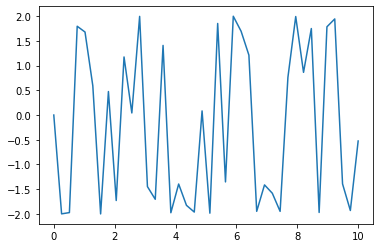

In [174]:
func = 4
N = 40
X = np.linspace(0, 10, N)
Y = []
for x in X:
   if (func==1):
      Y.append(2*m.pi*x+(2.5*rd.random())**2); TClass = 5  
   if (func==2):
      Y.append(2*m.sin(m.pi*x**2+5*x)); TClass = 0.1
   if (func==3):
      Y.append(2*m.sin(m.pi*(4*x)**3+5*x)); TClass = 0.1
   if (func==4):
      Y.append(2*m.sin(m.pi*(4*x)**3+5*x)); TClass = 0.05
plt.plot(X, Y, '-')
plt.show()

In [175]:
K = m.ceil((max(Y)-min(Y)/TClass))
print('K =',K)

def getZ(Y, K): 
  Z = []
  Min = min(Y); Max = max(Y)
  for y in Y:
    val2class = int(round((K-1)*(y-Min)/(Max-Min),0))
    Z.append(val2class)
  return Z

def getW(Z, Y, K): 
  W = []
  Min = min(Y); Max = max(Y)
  for z in Z:
    class2val = Min+z*(Max-Min)/(K-1)
    W.append(class2val)
  return W

def RMSE(X,Y):
  V = 0; sz = len(X)
  for i in range(sz):
    V += 1/sz*(X[i]-Y[i])**2
  return V**(1/2)

Z = getZ(Y, K)
W = getW(Z, Y, K)
print("Y =",Y)
print("Z =",Z)
print("W =",W)
print("RMSE =",RMSE(Y,W))

K = 42
Y = [0.0, -1.9983327609939927, -1.9728355740986776, 1.7957827178565446, 1.6793448718543371, 0.59115359830566, -1.9995956325171071, 0.47572360638865474, -1.7283990792216828, 1.1750049981490138, 0.04261252622484871, 1.9955300145691333, -1.4474290261704144, -1.703521078599632, 1.4082681395788625, -1.975796633075753, -1.3949694904027317, -1.8260020424206096, -1.961849734459962, 0.08364019116698057, -1.9845148150015204, 1.852273546552636, -1.3523822658603974, 1.998512680582167, 1.695079218904558, 1.2121837371915833, -1.9472163727349083, -1.4126289393357867, -1.581115886885798, -1.9479313698608713, 0.7632251612918843, 1.9924057997392968, 0.8639404166896681, 1.7497452939619962, -1.9701442633007082, 1.7850809095027698, 1.944001336057026, -1.392442981044524, -1.9302527679290051, -0.5247497074475576]
Z = [21, 0, 0, 39, 38, 27, 0, 25, 3, 33, 21, 41, 6, 3, 35, 0, 6, 2, 0, 21, 0, 40, 7, 41, 38, 33, 1, 6, 4, 1, 28, 41, 29, 38, 0, 39, 40, 6, 1, 15]
W = [0.04821594248495997, -1.9995956325171071

In [176]:
way = 2
prev = 4

def getP(Z, K, j):
  P = np.zeros((K,K))
  for i in range(j,len(Z)-2):
    P[Z[i-j],Z[i]] += 1
  S = P.sum(axis=1)
  for i in range(K):
    for j in range(K):
      if (S[i]!=0):
        P[i,j] = P[i,j] / S[i]
  return P

P = getP(Z, K , 1)
print(P)

if (way==0):
  P2 = P
  P3 = P
  P4 = P

if (way==1):
  print("P2 = P^2")
  P2 = np.matmul(P,P)
  print("P3 = P^3")
  P3 = np.matmul(P2,P)
  print("P4 = P^4")
  P4 = np.matmul(P3,P)

if (way==2):
  print("P2 = P[Z[i-2],Z[i]]")
  P2 = getP(Z,K,2)
  print("P3 = P[Z[i-3],Z[i]]")
  P3 = getP(Z,K,3)
  print("P4 = P[Z[i-4],Z[i]]")
  P4 = getP(Z,K,4)

if (prev==1):
  u1 = 1; u2 = 0; u3 = 0; u4 = 0
if (prev==2):
  u1 = 1; u2 = 1; u3 = 0; u4 = 0
if (prev==3):
  u1 = 1; u2 = 1; u3 = 1; u4 = 0
if (prev==4):
  u1 = 1; u2 = 1; u3 = 1; u4 = 1

[[0.14285714 0.         0.         ... 0.28571429 0.14285714 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.5        0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
P2 = P[Z[i-2],Z[i]]
P3 = P[Z[i-3],Z[i]]
P4 = P[Z[i-4],Z[i]]


PMData = 3.475
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
ERROR PERC. = 0.05555555555555555


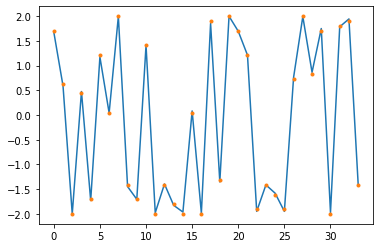

RMSE = 0.028826196750397035


In [177]:
 def predict(Y,Z):
  ZPRED = []; YREAL = []; ERRO = []
  for j in range(4,N):
    v4 = Z[j-4]; v3 = Z[j-3]; v2 = Z[j-2]; v1 = Z[j-1]; v0 = Z[j]
    #print(v4,v3,v2,v1,v0)

    # I want to predict v0
    M4 = P4[v4,:]; M3 = P3[v3,:]; M2 = P2[v2,:]; M1 = P[v1,:] 
    #print(M0); print(M1); print(M2); print(M3)
    #print("")
    #print("Prediction Prob ",u1,u2,u3,u4)
    R = np.zeros(len(M1))
    for i in range(len(M1)):             
      R[i] = min(u1, M1[i])/max(M1)
      if (u2>0 and M2.sum()>0.0):
        R[i] *= M2[i]/max(M2)
      if (u3>0 and M3.sum()>0.0):
        R[i] *= M3[i]/max(M3)
      if (u4>0 and M4.sum()>0.0):
        R[i] *= M4[i]/max(M4)
    #print(R)
    #print("v0 =",v0," pv0 =",np.argmax(R))
    YREAL.append(Y[j])
    ZPRED.append(np.argmax(R))
    if (v0==np.argmax(R)):
      ERRO.append(0)
    else:
      ERRO.append(1)

  print("PMData =", (u1*np.count_nonzero(P)+u2*np.count_nonzero(P2)+u3*np.count_nonzero(P3)+u4*np.count_nonzero(P4))/N)
  print(ERRO)
  print("ERROR PERC. =",sum(ERRO)/len(ERRO))

  tYREAL = YREAL[:-2]

  X = range(len(tYREAL))
  YPRED = getW(ZPRED,Y,K)[:-2]
  plt.plot(X, tYREAL, '-')
  plt.plot(X, YPRED, '.')
  plt.show()

  print("RMSE =",RMSE(tYREAL,YPRED))

predict(Y,Z)

40 40


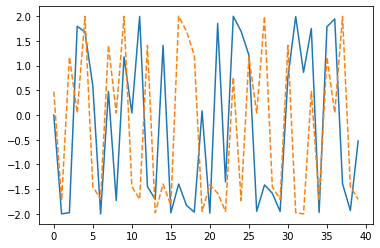

PMData = 3.475
[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
ERROR PERC. = 0.4444444444444444


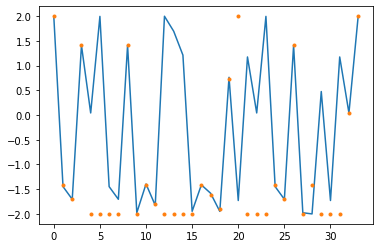

RMSE = 1.8880972981711652



In [178]:
G = []; NN = 2
for _ in range(m.ceil(10/NN)-1):
  i = rd.randint(0,N-4*NN)
  for j in range(4*NN):
    G.append(Y[i+j])
i = rd.randint(0,N-4*NN)
sz = len(G)
for j in range(i,i+N-sz):
  G.append(Y[j])
print(len(Y),len(G))
plt.plot(range(N), Y, '-')
plt.plot(range(N), G, '--')
plt.show()

predict(G,getZ(G,K))
print("")